**[📥 Click here to download this document and any associated data and images](/downloads/statistical-foundations.zip)**

<br>

In our other notebooks, we've learned how to process data - but we also need to know how to understand it and analyze it in convincing ways. Statistics is the core of this - it can reveal what is typical or what is an outlier, what relationships exist between different variables, and whether our assumptions about the data are accurate.

In order to do this, we are going to use the Python libraries `numpy` and `scipy`. Both of these libraries offer greater mathematical precision and access to a wide variety of statistical methods and tests, which we can apply to a dataset loaded in pandas. For the sake of this tutorial, we also use matplotlib to show some intuitive visualizations - but you don't need to worry about tinkering with these yet.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

For this tutorial, we are going to use election and census data that was adapted for [a project](https://schoolofcities.github.io/gta-immigration/political-shifts) published by the School of Cities looking at immigrant vote patterns in the GTA. The data we are using is adapted from the [2025 Ontario election](https://en.wikipedia.org/wiki/2025_Ontario_general_election) and the [2021 Canadian census](https://en.wikipedia.org/wiki/2021_Canadian_census). The data frame has the following columns:

 - `riding_name`: the name of the riding
 - `num_pop_tot`: the number of people in the riding
 - `num_imm_tot`: the number of immigrants in the riding
 - `num_imm_new`: the number of new immigrants in the riding
 - `avg_hou_inc`: the average household income in the riding
 - `num_vm_tot`: the number of visible minority individuals in the riding
 - `cons_pct`: the vote percent for the Progressive Conservative party
 - `lib_pct`: the vote percent for the Liberal Party
 - `ndp_pct`: the vote percent for the New Democratic Party (NDP)
 - `oth_pct`: the vote percent for other parties

In [3]:
df = pd.read_csv('./data/ont-ed_stats_2025.csv')
df.head()

,riding_name,num_pop_tot,num_imm_tot,num_imm_new,avg_hou_inc,num_vm_tot,cons_pct,lib_pct,ndp_pct,oth_pct
0,Brampton Centre,102309.0,48275.0,14985.0,103369.0,68880.0,51.85,33.92,8.77,5.45
1,Scarborough—Rouge Park,102256.0,52637.0,8294.0,120745.0,77090.0,52.98,34.75,10.38,1.89
2,Scarborough North,94688.0,60423.0,11513.0,103151.0,87647.0,52.98,34.75,10.38,1.89
3,Ajax,115392.0,47716.0,8721.0,137570.0,74759.0,44.16,44.96,7.01,3.87
4,Beaches—East York,106811.0,33588.0,9031.0,129975.0,39034.0,21.38,51.17,22.94,4.51


## Descriptive statistics: the shape of the data

### Central tendency

What is "typical" in a set of data? This is at the heart of the notion of the central tendency in statistics. There are three common ways to measure this, with the accompanying functions.

 - Mean (`np.mean()`): the average of all values
 - Median (`np.median()`): the "middle" value if you order them, ie. at the 50th percentile 
 - Mode (`stats.mode()`): the most common value

Let's compute some of these central tendency statistics for the NDP, and compare them to the distribution of vote shares in all ridings.

In [4]:
party_var = 'ndp_pct'

mean = np.mean(df[party_var])
median = np.median(df[party_var])
mode = stats.mode(df[party_var])

print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Mode: {mode.mode} (appears {mode.count} times)")

Mean: 14.11
Median: 6.88
Mode: 3.95 (appears 2 times)


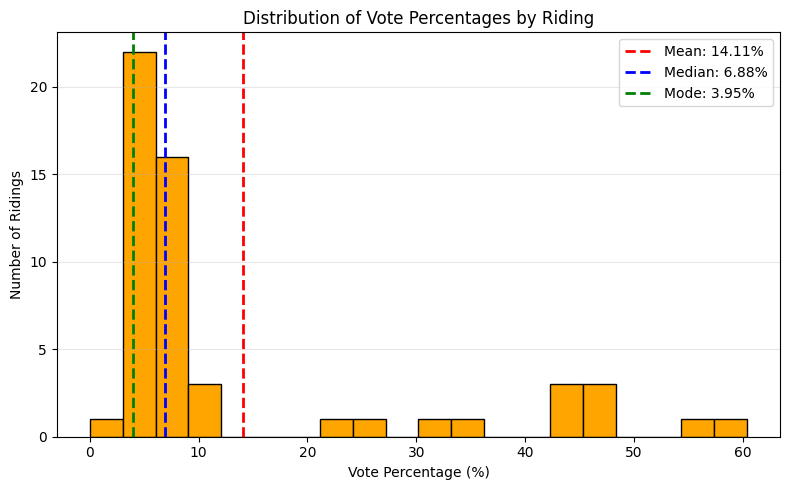

In [5]:
plt.figure(figsize=(8, 5))
plt.hist(df[party_var], bins=20, color='orange', edgecolor='black')

plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}%')
plt.axvline(median, color='blue', linestyle='--', linewidth=2, label=f'Median: {median:.2f}%')
plt.axvline(mode.mode, color='green', linestyle='--', linewidth=2, label=f'Mode: {mode.mode:.2f}%')

plt.title('Distribution of Vote Percentages by Riding')
plt.xlabel('Vote Percentage (%)')
plt.ylabel('Number of Ridings')
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

Notice the difference between the mean and the median. While the mean accounts for all of the data directly, it is also sensitive to outliers and can be pulled in one direction or another. This is often called a *skew* (the histogram above shows a right skew).

**Try setting the variable `party_var` to different parties to see how the matter of mean vs. median plays out for different distributions**.

In spreadsheet software like Excel or Google Sheets, you can also calculate the mean, the median, and mode for a given variable using the appropriate functions (`=AVERAGE`,` =MEDIAN`,  `=MODE`). You can also create a histogram (a commonly used chart type that shows frequency distributions, as seen above). To do this, you must select the range of the variable you wish to chart, go to ‘Insert’, then ‘Statistical’ from the Charts group, and then select the chart type ‘Histogram’. You can then modify the Histogram chart elements, such as the number or size of the bins. Learn more here: 

- [Create a histogram in Excel, including modifying the bins](https://support.microsoft.com/en-us/office/create-a-histogram-85680173-064b-4024-b39d-80f17ff2f4e8)

- [Create a histogram in Google Sheets](https://support.google.com/docs/answer/9146867?hl=en)


### Dispersion

Similar to how we ask what is typical in a set of data, it's also important to ask how that data varies. This is what we refer to when we talk about the dispersion of a distribution, and there are four common measures (with accompanying functions):

 - Standard deviation (`np.std()`): How spread out data points are from the mean, in the same units as the original data.

 - Variance (`np.var()`): The average squared deviation from the mean, representing how wildly individual values differ from the 
 average or overall unevenness.

 - Range (`np.max() - np.min()`): The difference between the maximum and minimum values, showing the total spread of the dataset.

 - Interquartile range (`np.percentile(..., [25, 75])`): The range of the middle 50% of data (Q3–Q1), reducing sensitivity to outliers.

Let's take a look at how the number of immigrants across different ridings varies, and compare it with the mean and median.

In [6]:
col_var = 'num_imm_tot'

mean = np.mean(df[col_var])
median = np.median(df[col_var])
std_dev = np.std(df[col_var], ddof=1)
variance = np.var(df[col_var])
data_range = np.max(df[col_var]) - np.min(df[col_var])
q1, q3 = np.percentile(df[col_var], [25, 75])
iqr = q3 - q1

print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print('===')
print(f"Std Dev: {std_dev:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Range: {data_range:.2f}")
print(f"IQR: {iqr:.2f}")

Mean: 52330.33
Median: 54255.00
===
Std Dev: 13630.44
Variance: 182348372.93
Range: 62964.00
IQR: 18211.50


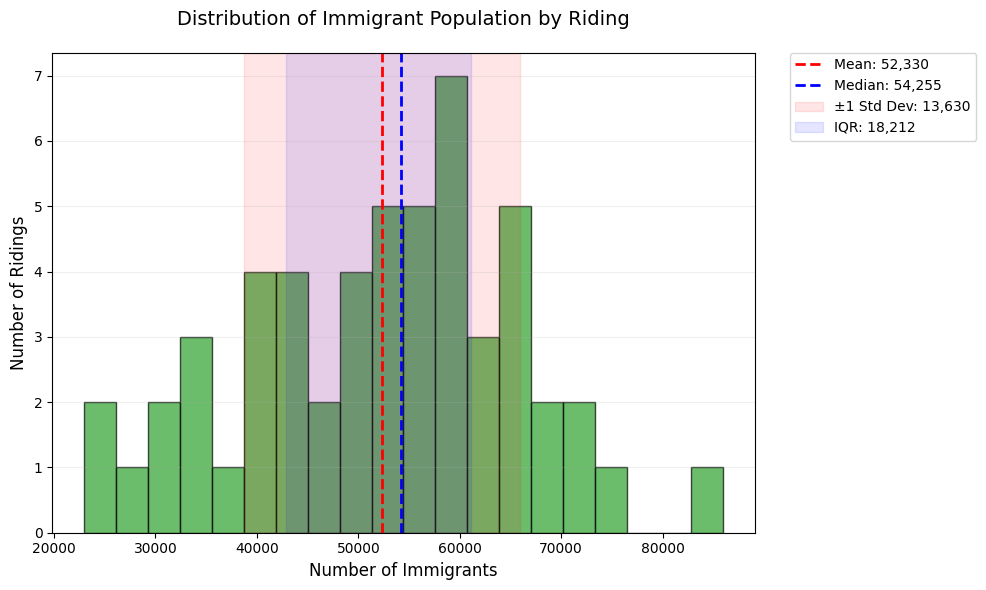

In [7]:
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Histogram
n, bins, patches = plt.hist(df[col_var], bins=20, color='#2ca02c', edgecolor='black', alpha=0.7)

# Central tendency and dispersion
plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean:,.0f}')
plt.axvline(median, color='blue', linestyle='--', linewidth=2, label=f'Median: {median:,.0f}')

plt.axvspan(mean - std_dev, mean + std_dev, color='red', alpha=0.1, label=f'±1 Std Dev: {std_dev:,.0f}')
plt.axvspan(q1, q3, color='blue', alpha=0.1, label=f'IQR: {iqr:,.0f}')

# Annotations
plt.title('Distribution of Immigrant Population by Riding', pad=20, fontsize=14)
plt.xlabel('Number of Immigrants', fontsize=12)
plt.ylabel('Number of Ridings', fontsize=12)
plt.grid(axis='y', alpha=0.2)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()

Take a look at how different measures of dispersion capture different parts of the data. **Once again, set `col_var` to a different variable or two and examine the different measures of dispersion and how they play out**.

In spreadsheet software like Excel or Google Sheets, you can measure the dispersion of your data using individual formulas that you apply to the specific columns you wish to analyze. You can calculate specific percentiles or the standard deviation using the  [=PERCENTILE](https://support.microsoft.com/en-us/office/percentile-function-91b43a53-543c-4708-93de-d626debdddca) and [=STDEVA](https://support.microsoft.com/en-us/office/stdeva-function-5ff38888-7ea5-48de-9a6d-11ed73b29e9d) functions. As noted in the previous section, a histogram will also allow you to see the overall dispersion of your data.

## Bivariate analysis: finding similarities in the data

### Correlation

Correlation measures how closely two variables move together, ranging from -1 (as X increases, Y decreases), to +1 (as X increases, Y increases). A value near 0 indicates no linear association. While it is acceptable to use the word 'relationship' here instead of 'association', it's worth noting that a strong correlation is not enough to show causation -- namely, if we had a correlation value of 1, we can't definitively say that Y increases *because* X increases, only that they increase together.

We'll be looking at a very common measure called Pearson correlation. It measures how closely two variables follow a straight-line relationship, ideal for normally distributed data with linear trends (e.g., height vs. weight). While we won't look at it today, it's worth independently looking into "Spearman Rank Correlation" as well - which can capture nonlinear trends.

We'll look at the example of vote share for the Progressive Conservatives and the number of immigrants in a riding below. In the project that this data was drawn from, we used correlation to show how immigrant voters in the GTA are shifting conservative over time.

In [8]:
census_var = 'num_imm_tot'
party_var = 'cons_pct'

r, p_val = stats.pearsonr(df[census_var], df[party_var])
print(f"Pearson corr: {r:.2f} (p-value: {p_val:.3f})")

Pearson corr: 0.40 (p-value: 0.003)


Here we can see a correlation between the two variables we have chosen. **Try setting `census_var` and `party_var` to different column values and see if there is a correlation between those as well, or not!**

In spreadsheet software like Excel or Google Sheets, you can calculate the Pearson correlation using the =PEARSON function for any two variable arrays. Try replicating the analysis above in Excel or Google Sheets. Learn more here: 

- [Pearson correlation in Excel](https://support.microsoft.com/en-us/office/pearson-function-0c3e30fc-e5af-49c4-808a-3ef66e034c18)

- [Pearson correlation in Google Sheets](https://support.google.com/docs/answer/3093990?hl=en)


## Linear regression: relationships between variables

### Simple linear regression (in Python)

*Simple linear regression* identifies the straight-line relationship between two variables, allowing you to predict outcomes (e.g., voting percentages) based on another factor (e.g., immigrant population). It calculates a "best-fit" line that minimizes the distance between all data points and the line itself, summarized by the equation *y = slope * x + intercept*.

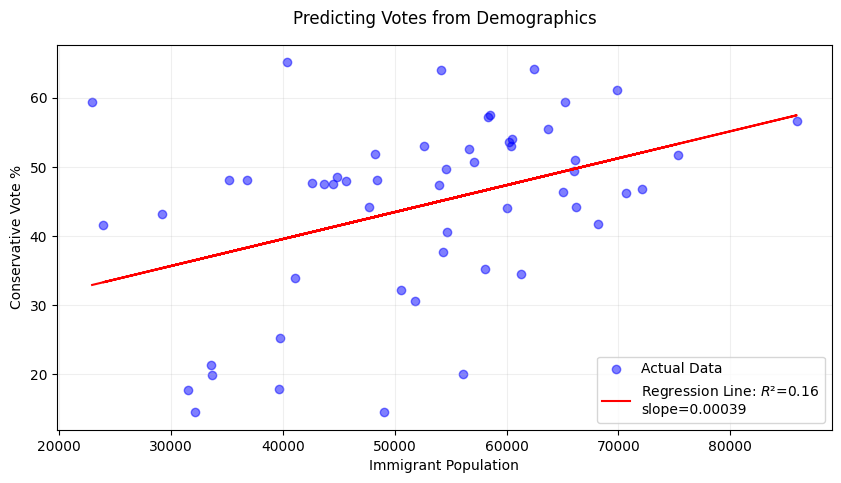

In [9]:
census_var = 'num_imm_tot'
party_var = 'cons_pct'

x = df[census_var].values  # Independent variable
y = df[party_var].values     # Dependent variable

# Fit regression
slope, intercept, r_value, p_value, _ = stats.linregress(x, y)
r_squared = r_value ** 2

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(x, y, color='blue', alpha=0.5, label='Actual Data')
plt.plot(x, intercept + slope * x, 'r-', label=f'Regression Line: $R²$={r_squared:.2f}\nslope={slope:.5f}')
plt.xlabel('Immigrant Population')
plt.ylabel('Conservative Vote %')
plt.title('Predicting Votes from Demographics', pad=15)
plt.legend()
plt.grid(alpha=0.2)
plt.show()

In [10]:
print(f"Model Equation: {party_var} = {intercept:.2f} + {slope:.5f} * {census_var}")
print(f"R² = {r_squared:.3f} (Explains {r_squared*100:.1f}% of variance)")
print(f"p-value = {p_value:.4f} {'(Significant)' if p_value < 0.05 else '(Not significant)'}")

Model Equation: cons_pct = 23.99 + 0.00039 * num_imm_tot
R² = 0.161 (Explains 16.1% of variance)
p-value = 0.0026 (Significant)


Not all regression lines *fit* the underlying data in the same way. For this reason, *R²* is used to measure how well the regression line fits the data, ranging from 0 (no fit) to 1 (perfect fit). It answers: “What percentage of variation in voting patterns can be explained by immigrant population?”. In the above example, we can say that 16.1% of the differences in conservative votes across ridings are predictable from immigrant numbers—the rest is due to other factors.

**Now try the following two exercises to examine outcomes**:

 - Change the x-variable to `avg_hou_inc`. Does wealth predict conservative votes better than immigrant population?
 
 - Add `ndp_pct` as y-variable. Is the relationship positive or negative?

### Simple linear regression (in Excel)

It is less common to use spreadsheet software like Excel or Google Sheets for regression analysis. However, there are ways to manually obtain the model equation for a simple linear regression and obtain the associated R² value. 

1. First, create a scatter plot of the two variables you wish to use for your regression. Select your data arrays, go to ‘Insert’, then under Chart Type select ‘Scatter Plot’.  

2. Once your scatter plot is displayed, click on the drop-down menu for ‘Add Chart Element’ in the top left corner of the Chart Design tab, select ‘Trendline’, and then ‘Linear Trendline’. 

3. Once your trendline is visible on your scatter plot chart, you can then go to Trendline Options and check the following boxes ‘Display equation on chart’ and ‘Display R-squared on chart’. 

4. You should now see the model equation and the R-square value displayed on your scatter plot.

5. Note that you can also manually calculate the R-squared value using the =RSQ function. 

See this video for a live example of how to do this Excel. Note that similar steps can be followed in Google Sheets. 

- [YouTube tutorial by Steven Bradburn on adding a trendline, equation, and R2 in Excel](https://www.youtube.com/watch?v=JoLpTefCIzk).

If you have the Data Analysis Toolpak add-on, you can also use this to explore your linear regressions in Excel: 

- [Data Analysis Toolpak: Linear Regression in Excel](https://www.datacamp.com/tutorial/linear-regression-in-excel)

And for those using Google Sheets!

- [Linear regression in Google Sheets tutorial](https://www.statology.org/linear-regression-google-sheets/)

### Other kinds of regression

While linear regression is ideal for modeling straight-line relationships, real-world data often requires more flexible approaches. Below are key alternatives with use cases relevant to political/demographic data, along with their Python implementations:

 - *Multiple Linear Regression:* Modeling how multiple demographic factors jointly influence voting patterns (e.g., predicting Conservative vote share using both immigrant population and average income).

 - *Polynomial Regression:* Modeling curved relationships (e.g., voter turnout vs. age, where middle-aged groups vote more than very young or elderly).

 - *Logistic Regression:* Predicting binary outcomes (e.g., whether a riding will vote Conservative (1) or not (0) based on income thresholds).

 - *Ridge/Lasso Regression:* Handling multicollinearity (e.g., when immigrant population and visible minority numbers are strongly correlated).

 - Many more!

In case you want to do these more complex kinds of regression, the typical go to library in Python is [scikit-learn](https://scikit-learn.org/stable/index.html).

## Hypothesis testing: making conclusions

Hypothesis testing evaluates whether observed patterns in data are statistically significant or likely due to random chance. A t-test compares the means of two groups (e.g., Conservative vote share in high- vs. low-income ridings) to determine if their difference is meaningful.

The *t-statistic* measures the size of the difference relative to the variability in the data—think of it like a "signal-to-noise ratio" where if the group difference (signal) stands out from natural variation (noise). Larger absolute values (e.g., `|t| > 2`) suggest stronger evidence against no difference (a strong "signal"), and the sign indicates direction (e.g., positive = Group A > Group B).

The p-value then calculates how likely we’d see this t-statistic if no true difference existed. If `p < 0.05`, we reject the null hypothesis.

There's two different t-tests we'll illustrate today. 
 - One-sample: Compares data to a fixed number
 - Two-sample: Compares two datasets to each other.

### One-Sample t-test

Our dataset only includes ridings within the Greater Toronto Area (GTA) - but more than half of the ridings exist in the rest of Ontario. In the 2025 election, the Conservatives won 43% of the vote - does the average vote share for Conservatives in the GTA vary from Ontario in full?

In [11]:
party_var = 'cons_pct'
total_party_vote = 43

sample_data = df[party_var]
t_stat, p_value = stats.ttest_1samp(sample_data, popmean=total_party_vote)

print(f"t-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")
print("Significantly different!" if p_value < 0.05 else "No significant difference.")

t-statistic: 0.76, p-value: 0.4497
No significant difference.


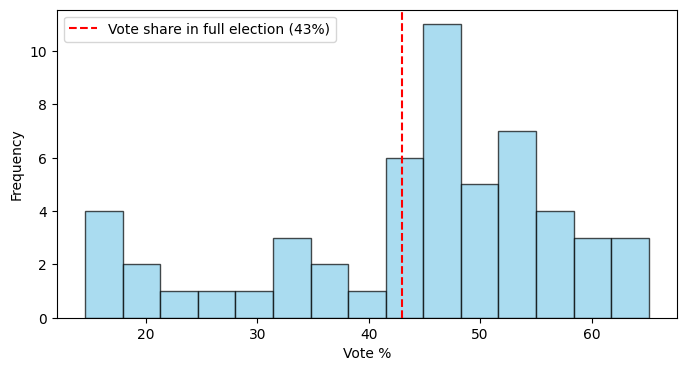

In [12]:
plt.figure(figsize=(8, 4))
plt.hist(sample_data, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(total_party_vote, color='red', linestyle='--', label=f'Vote share in full election ({total_party_vote}%)')
plt.xlabel('Vote %')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Two-Sample t-test

We've talked a lot about immigrant ridings as a whole, but we can also examine different subsets of them. For example: Do high-immigrant ridings vote differently than low-immigrant ridings?

In [14]:
census_var = 'num_imm_tot'
party_var = 'cons_pct'

# Split data into two groups (median split)
median_data = df[census_var].median()
high_data = df[df[census_var] > median_data][party_var]
low_data = df[df[census_var] <= median_data][party_var]

# Independent t-test
t_stat, p_value = stats.ttest_ind(high_data, low_data)

print(f"t-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")
print("Significantly different!" if p_value < 0.05 else "No significant difference.")

t-statistic: 2.52, p-value: 0.0149
Significantly different!


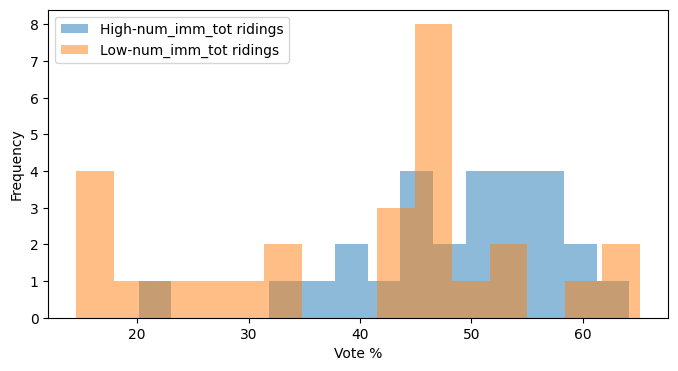

In [15]:
plt.figure(figsize=(8, 4))
plt.hist(high_data, bins=15, alpha=0.5, label=f'High-{census_var} ridings')
plt.hist(low_data, bins=15, alpha=0.5, label=f'Low-{census_var} ridings')
plt.xlabel('Vote %')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Finally, substitute out the census and party variables for different versions and run this analysis. Assess whether there are significant differences in the new hypothesis that you are testing**.


As previously noted, it is less common to perform statistical analysis using spreadsheet software. However, some options are available. For example:

- You can use the `=T.TEST` function in Excel and Google Sheets to return the p-value for a two-sample t-test (note that it will only return the p-value, not the t-statistic). 

- For a one-sample t-test, you can calculate the p-value and t-statistic manually. [This video tutorial](https://youtu.be/OCSmMABkVqQ?si=raegs2rcv5WaWNsG) provides an example of how to do this. 

- If you are using the Data Analysis Toolpak add-in in Excel, you can run both one-sample or two-sample t-tests using the add-in features. 
